## Problem Statement:

Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.

They recently launched a feature where students/ learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.

### How can you help here?
- Your analysis will help Jamboree in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables.



## 1. Importing the libraries and loading the data

In [ ]:
from logging import warning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Lasso,Ridge,LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [ ]:
df = pd.read_csv("Jamboree.csv")

## 2. Basic Exploration

In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.shape

(500, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


## 3. EDA

In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df["Serial No."].nunique() == df.shape[0]

True

#### Univariate Analysis

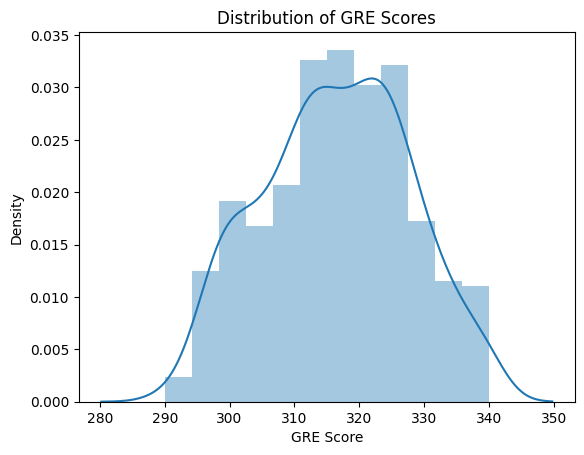

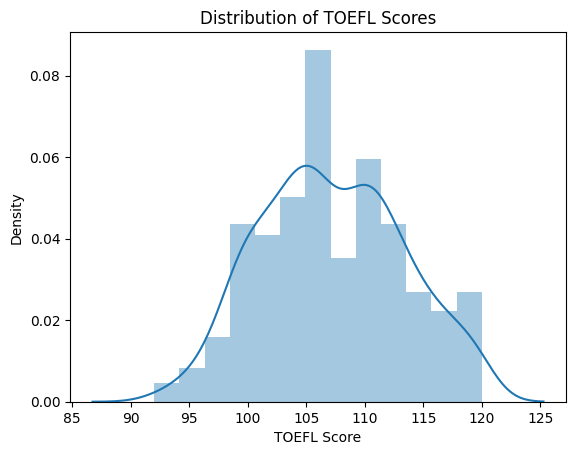

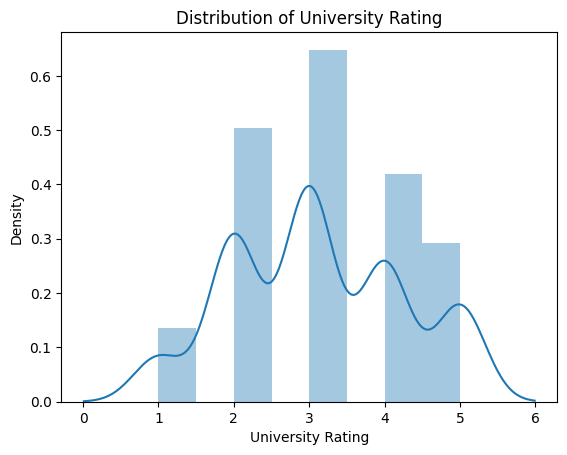

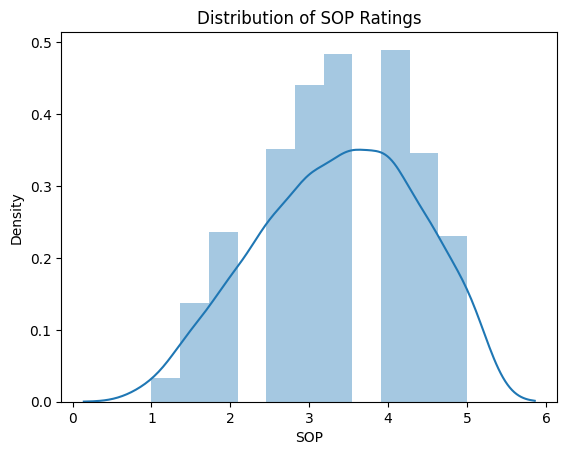

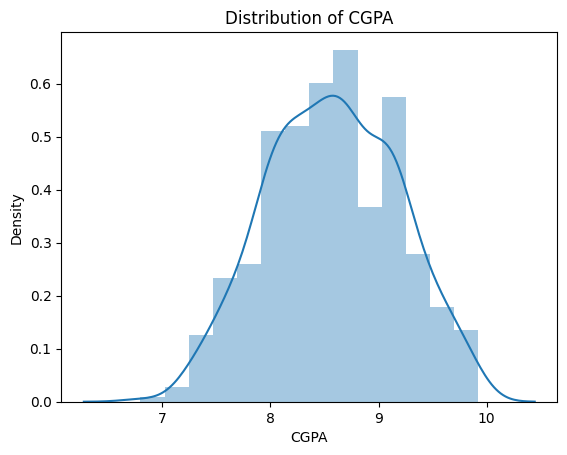

In [ ]:
fig = sns.distplot(df['GRE Score'], kde=True)
plt.title("Distribution of GRE Scores")
plt.show()

fig = sns.distplot(df['TOEFL Score'], kde=True)
plt.title("Distribution of TOEFL Scores")
plt.show()

fig = sns.distplot(df['University Rating'], kde=True)
plt.title("Distribution of University Rating")
plt.show()

fig = sns.distplot(df['SOP'], kde=True)
plt.title("Distribution of SOP Ratings")
plt.show()

fig = sns.distplot(df['CGPA'], kde=True)
plt.title("Distribution of CGPA")
plt.show()

plt.show()

Q) How do we check if my distribution is normal?
- qq plots
- Shapiro-Wilk Test
- KS Test
- Boxplot

#### Bivariate Analysis

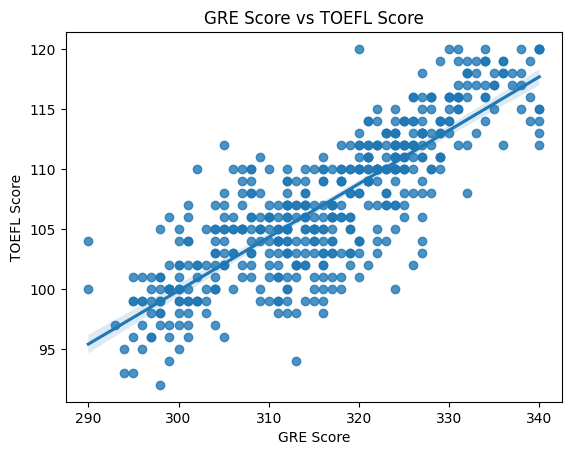

In [ ]:
fig = sns.regplot(x="GRE Score", y="TOEFL Score", data=df)
plt.title("GRE Score vs TOEFL Score")
plt.show()

In [ ]:
## Insights: People with higher GRE Scores also have higher TOEFL Scores which is justified because both TOEFL and GRE have a verbal section which although not similar are relatable

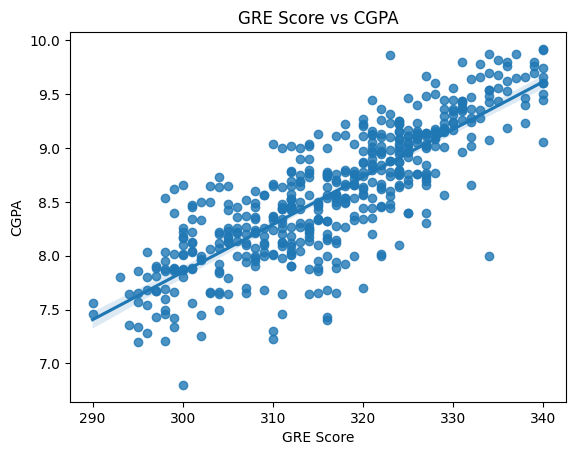

In [ ]:
fig = sns.regplot(x="GRE Score", y="CGPA", data=df)
plt.title("GRE Score vs CGPA")
plt.show()

In [ ]:
## Insights: Although there are exceptions, people with higher CGPA usually have higher GRE scores maybe because they are smart or hard working

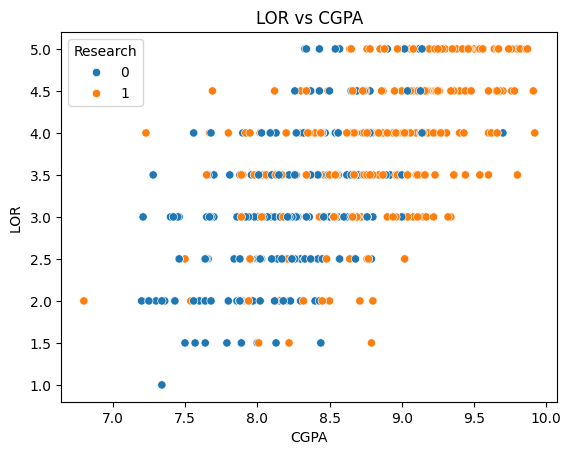

In [ ]:
fig = sns.scatterplot(x="CGPA", y="LOR ", data=df, hue="Research")
plt.title("LOR vs CGPA")
plt.show()

Insights: LORs are not that related with CGPA so it is clear that a persons LOR is not dependent on that persons academic excellence. Having research experience is usually related with a good LOR which might be justified by the fact that supervisors have personal interaction with the students performing research which usually results in good LOR.

In [ ]:
## Perform a Hypothesis Test to confirm this statistical evidence.

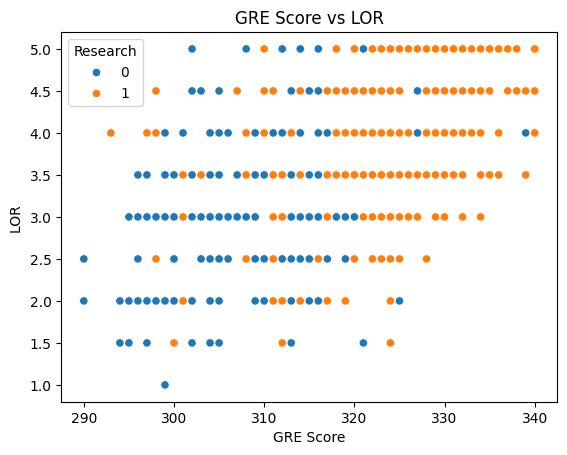

In [ ]:
fig = sns.scatterplot(x="GRE Score", y="LOR ", data=df, hue="Research")
plt.title("GRE Score vs LOR")
plt.show()

Insights: GRE scores and LORs are also not that related. People with different kinds of LORs have all kinds of GRE scores

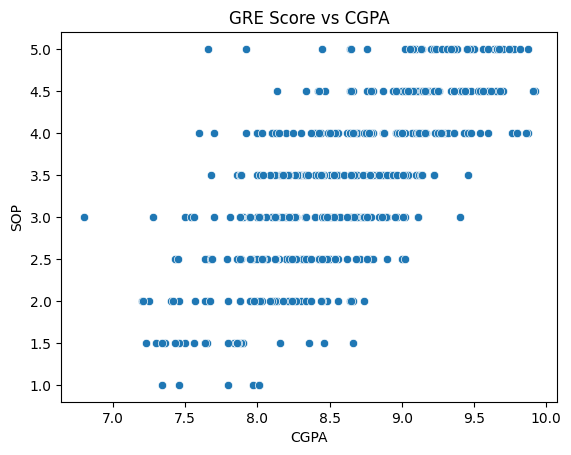

In [ ]:
fig = sns.scatterplot(x="CGPA", y="SOP", data=df)
plt.title("GRE Score vs CGPA")
plt.show()

Insights: CGPA and SOP are not that related because Statement of Purpose is related to academic performance, but since people with good CGPA tend to be more hard working so they have good things to say in their SOP which might explain the slight  move towards higher CGPA as along with good SOPs

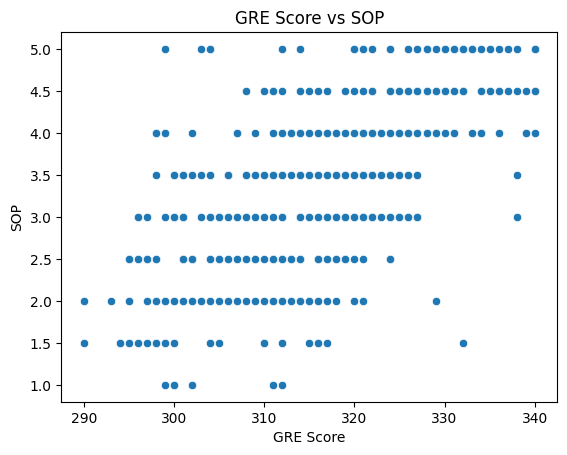

In [ ]:
fig = sns.scatterplot(x="GRE Score", y="SOP", data=df)
plt.title("GRE Score vs SOP")
plt.show()

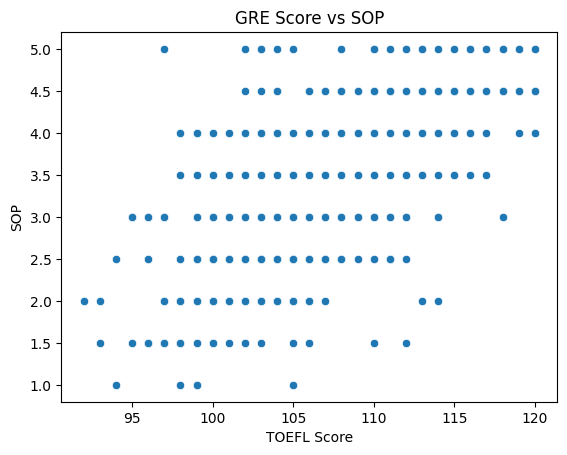

In [ ]:
fig = sns.scatterplot(x="TOEFL Score", y="SOP", data=df)
plt.title("GRE Score vs SOP")
plt.show()

In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
## Pair plot
## Create a function that takes a list of columns as input and return scatterplots of all unique combinations.

### Correation Analysis

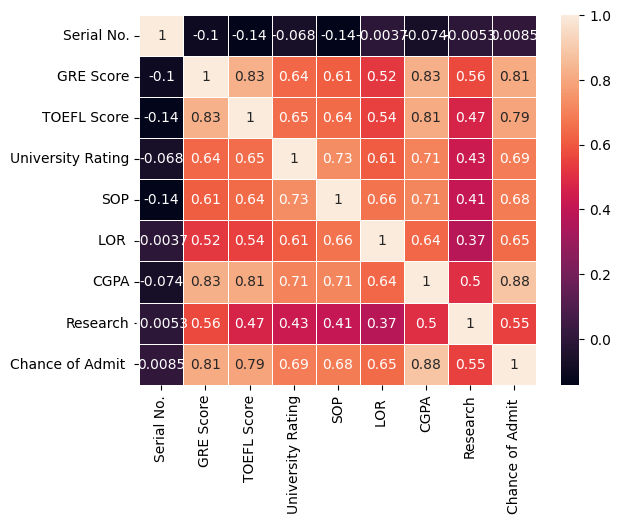

In [ ]:
corr = df.corr()
sns.heatmap(corr, linewidths=.5, annot=True)
plt.show()

In [ ]:
df = df.drop(['Serial No.'], axis=1)

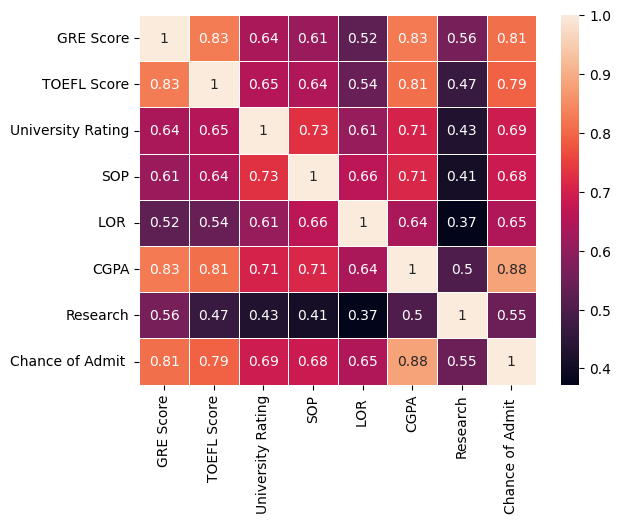

In [ ]:
corr = df.corr()
sns.heatmap(corr, linewidths=.5, annot=True)
plt.show()

In [ ]:
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


## 4. ML Design: Preprocessing

In [ ]:
## Split our data into X and y.

In [ ]:
X = df.drop(['Chance of Admit '], axis=1)
y = df['Chance of Admit ']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, shuffle=True)

In [ ]:
X_train, y_train

(     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
 239        299          100                  1  1.5   2.0  7.89         0
 170        312          101                  2  2.5   3.5  8.04         1
 41         316          105                  2  2.5   2.5  8.20         1
 380        322          104                  3  3.5   4.0  8.84         1
 475        300          101                  3  3.5   2.5  7.88         0
 ..         ...          ...                ...  ...   ...   ...       ...
 174        321          111                  4  4.0   4.0  8.97         1
 53         324          112                  4  4.0   2.5  8.10         1
 456        299          100                  2  2.0   2.0  7.88         0
 485        311          101                  2  2.5   3.5  8.34         1
 411        313           94                  2  2.5   1.5  8.13         0
 
 [400 rows x 7 columns],
 239    0.59
 170    0.68
 41     0.49
 380    0.78
 475    0.59
        

In [ ]:
## Scaling my data

X_train_columns=X_train.columns

std=StandardScaler()

X_train_std=std.fit_transform(X_train)

In [ ]:
X_train_std

array([[-1.50464215, -1.15365096, -1.82471869, ..., -1.66508112,
        -1.10741255, -1.12244688],
       [-0.36691652, -0.9894886 , -0.95164755, ..., -0.01102703,
        -0.8626264 ,  0.89091075],
       [-0.01684709, -0.33283918, -0.95164755, ..., -1.11372976,
        -0.60152117,  0.89091075],
       ...,
       [-1.50464215, -1.15365096, -0.95164755, ..., -1.66508112,
        -1.12373162, -1.12244688],
       [-0.45443387, -0.9894886 , -0.95164755, ..., -0.01102703,
        -0.37305409,  0.89091075],
       [-0.27939916, -2.1386251 , -0.95164755, ..., -2.21643248,
        -0.71575471, -1.12244688]])

In [ ]:
X_train=pd.DataFrame(X_train_std, columns=X_train_columns)
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,-1.504642,-1.153651,-1.824719,-1.874062,-1.665081,-1.107413,-1.122447
1,-0.366917,-0.989489,-0.951648,-0.867179,-0.011027,-0.862626,0.890911
2,-0.016847,-0.332839,-0.951648,-0.867179,-1.113730,-0.601521,0.890911
3,0.508257,-0.497002,-0.078576,0.139705,0.540324,0.442900,0.890911
4,-1.417125,-0.989489,-0.078576,0.139705,-1.113730,-1.123732,-1.122447
...,...,...,...,...,...,...,...
395,0.420740,0.652135,0.794495,0.643147,0.540324,0.655048,0.890911
396,0.683292,0.816297,0.794495,0.643147,-1.113730,-0.764712,0.890911
397,-1.504642,-1.153651,-0.951648,-1.370620,-1.665081,-1.123732,-1.122447
398,-0.454434,-0.989489,-0.951648,-0.867179,-0.011027,-0.373054,0.890911


In [ ]:
X_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
217,321,109,4,4.0,4.0,9.13,1
362,338,115,5,4.5,5.0,9.23,1
119,327,104,5,3.0,3.5,8.84,1
107,338,117,4,3.5,4.5,9.46,1
311,328,108,4,4.5,4.0,9.18,1
...,...,...,...,...,...,...,...
105,316,110,3,4.0,4.5,8.78,1
274,315,100,1,2.0,2.5,7.95,0
478,318,103,3,4.0,4.5,8.49,1
263,324,111,3,2.5,1.5,8.79,1


## 5. Model Building

In [ ]:
models = [
           ['Linear Regression :', LinearRegression()],

          ['Lasso Regression :', Lasso(alpha=0.5)], #try with different alpha values
          ['Ridge Regression :', Ridge(alpha=1.0)] #try with different alpha values
          ]

In [ ]:
for name,model in models:
    model.fit(X_train, y_train.values)
    predictions = model.predict(std.transform(X_test))
    print(name, (np.sqrt(mean_squared_error(y_test, predictions))), r2_score(y_test, predictions))
    print("coefficient: ", model.coef_)
    print("intercept: ", model.intercept_)
    print("------"* 10)

Linear Regression : 0.055217830275014465 0.829772346696158
coefficient:  [0.01876528 0.01578457 0.00803288 0.0005331  0.01476858 0.07504381
 0.01362345]
intercept:  0.7194750000000001
------------------------------------------------------------
Lasso Regression : 0.13431163622337416 -0.007160574350579596
coefficient:  [0. 0. 0. 0. 0. 0. 0.]
intercept:  0.7194750000000001
------------------------------------------------------------
Ridge Regression : 0.05518325060687863 0.8299854870014578
coefficient:  [0.01903396 0.01596277 0.0081233  0.00068555 0.01483101 0.07428398
 0.01360472]
intercept:  0.7194750000000001
------------------------------------------------------------


#### OLS(Ordinary Least Square Model)

In [ ]:
# sklearn ---> Gradient Descent
# StatsModel ---> OLS (Cumputation of finiding the loss using Matrix Mutiplication)

In [ ]:
import statsmodels.api as sm

X_train = sm.add_constant(X_train)

model = sm.OLS(y_train.values, X_train).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     254.5
Date:                Tue, 19 Aug 2025   Prob (F-statistic):          1.59e-141
Time:                        15:08:01   Log-Likelihood:                 553.96
No. Observations:                 400   AIC:                            -1092.
Df Residuals:                     392   BIC:                            -1060.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7195      0.00

In [ ]:
X_train_new=X_train.drop(columns='SOP')

In [ ]:
model1 = sm.OLS(y_train.values, X_train_new).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     297.7
Date:                Tue, 19 Aug 2025   Prob (F-statistic):          8.88e-143
Time:                        15:13:49   Log-Likelihood:                 553.95
No. Observations:                 400   AIC:                            -1094.
Df Residuals:                     393   BIC:                            -1066.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7195      0.00

## Assumptions of LR model

In [ ]:
# 1) No Multicollinearity (VIF)
# 2) Normality of Residuals
# 3) No Hetroscadascity
# 4) No Autocorrelation
# 5) Assumption of Linearity

### VIF(Variance Inflation Factor)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(dataset,col):
  dataset=dataset.drop(columns=col,axis=1)
  vif=pd.DataFrame()
  vif['features']=dataset.columns
  vif['VIF_Value']=[variance_inflation_factor(dataset.values,i) for i in range(dataset.shape[1])]
  return vif

In [ ]:
calculate_vif(X_train_new,[])

,features,VIF_Value
0,const,1.000000
1,GRE Score,4.722332
2,TOEFL Score,3.955630
3,University Rating,2.323699
4,LOR,1.896616
5,CGPA,5.052717
6,Research,1.531654


In [ ]:
X_test_std= std.transform(X_test)

In [ ]:
X_test=pd.DataFrame(X_test_std, columns=X_train_columns) # col name same as train datasets

In [ ]:
X_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.420740,0.323810,0.794495,0.643147,0.540324,0.916153,0.890911
1,1.908535,1.308784,1.667566,1.146589,1.643027,1.079344,0.890911
2,0.945844,-0.497002,1.667566,-0.363737,-0.011027,0.442900,0.890911
3,1.908535,1.637109,0.794495,0.139705,1.091676,1.454682,0.890911
4,1.033361,0.159648,0.794495,1.146589,0.540324,0.997748,0.890911
...,...,...,...,...,...,...,...
95,-0.016847,0.487973,-0.078576,0.643147,1.091676,0.344985,0.890911
96,-0.104364,-1.153651,-1.824719,-1.370620,-1.113730,-1.009498,-1.122447
97,0.158188,-0.661164,-0.078576,0.643147,1.091676,-0.128268,0.890911
98,0.683292,0.652135,-0.078576,-0.867179,-2.216432,0.361304,0.890911


In [ ]:
X_test = sm.add_constant(X_test)

In [ ]:
X_test_del=list(set(X_test.columns).difference(set(X_train_new.columns)))

In [ ]:
X_test_del

['SOP']

In [ ]:
print(f'Dropping {X_test_del} from test set')

Dropping ['SOP'] from test set


In [ ]:
X_test_new=X_test.drop(columns=X_test_del)

In [ ]:
X_test_new

,const,GRE Score,TOEFL Score,University Rating,LOR,CGPA,Research
0,1.0,0.420740,0.323810,0.794495,0.540324,0.916153,0.890911
1,1.0,1.908535,1.308784,1.667566,1.643027,1.079344,0.890911
2,1.0,0.945844,-0.497002,1.667566,-0.011027,0.442900,0.890911
3,1.0,1.908535,1.637109,0.794495,1.091676,1.454682,0.890911
4,1.0,1.033361,0.159648,0.794495,0.540324,0.997748,0.890911
...,...,...,...,...,...,...,...
95,1.0,-0.016847,0.487973,-0.078576,1.091676,0.344985,0.890911
96,1.0,-0.104364,-1.153651,-1.824719,-1.113730,-1.009498,-1.122447
97,1.0,0.158188,-0.661164,-0.078576,1.091676,-0.128268,0.890911
98,1.0,0.683292,0.652135,-0.078576,-2.216432,0.361304,0.890911


In [ ]:
#Prediction from the clean model
pred = model1.predict(X_test_new)

from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

print('Mean Absolute Error ', mean_absolute_error(y_test.values,pred) )
print('Root Mean Square Error ', np.sqrt(mean_squared_error(y_test.values,pred) ))

Mean Absolute Error  0.03840109116875635
Root Mean Square Error  0.055234878336987675


### Mean of Residuals

In [ ]:
residuals = y_test.values-pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 0.003012969883922999


### Test for Homoscedasticity

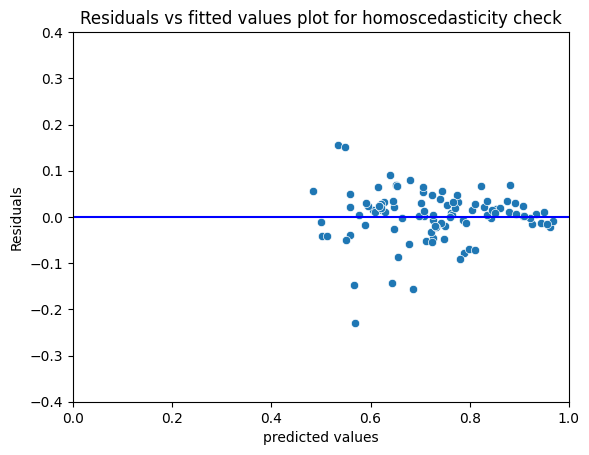

In [ ]:
p = sns.scatterplot(x=pred,y=residuals)
plt.xlabel('predicted values')
plt.ylabel('Residuals')
plt.ylim(-0.4,0.4)
plt.xlim(0,1)
p = sns.lineplot(x=[0,26], y=[0,0], color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_test)
lzip(name, test)

[('F statistic', np.float64(0.5612662341929273)),
 ('p-value', np.float64(0.9676834033190868))]

### Normality of residuals

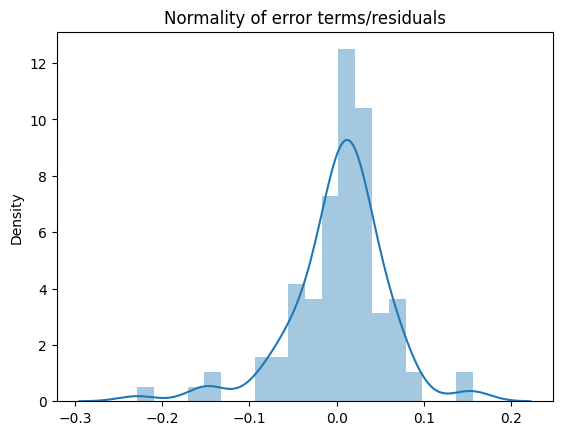

In [ ]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

Create a function that will take a trained model and give you the output.

In [ ]:
1) Train the model as it is with outliers (Model 1) [Baseline]
2) Train the model without outlier (i.e loss of data): (Model2)

## Insights and Recommendation

In [ ]:
## Insights will come from EDA
## Recommendation will come from Model Performance/ Feature Importance.